# <div style="text-align: center; background-color: #3977BB; font-size: 30px; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px;">Análisis del mercado de trabajo en el ámbito del Data</div>

![image](https://dribbble.com/shots/17418538-Data-analysis)

<h3 style="text-align: left; font-size: 30px; background-color: #3977BB; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px;font-size: 24px"> Introducción y objetivo del Notebook</h3>

#### ¿Estás pensando en dedicarte profesionalmente al análisis de datos? ¿Estás trabajando actualmente en el ámbito del Data? ¿Te gustaría conocer un poco mejor las diferentes opciones de mercado que existen actualmente y su remuneración? 

#### Si quieres conocer un poco más a fondo el mercado de trabajo en el ámbito del Data, te invito a leer este notebook.

#### El objetivo del Notebook es analizar los siguientes puntos :
1. Salarios
2. Principales puestos 
3. Nivel de experiencia de los candidatos
4. Trabajo remoto/híbrido (presencialidad)
5. Tamaño de la empresa
6. Trabajo a tiempo parcial/completo/freelance (tipo de contrato)
7. Localización de la empresa

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #3977BB; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>Tabla de contenidos</h3>
    
 
        

<h3 style="text-align: left; background-color: #3977BB; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px;font-size: 24px"> Data Set</h3>

#### Data set publicado en la web: https://ai-jobs.net/salaries/download/

#### Este sitio recopila información salarial de manera anónima de profesionales de todo el mundo en el ámbito de la IA/ML/Ciencia de Datos y la pone a disposición del público.

#### El objetivo principal de este dataset es tener datos que puedan proporcionar una mejor orientación en cuanto a la retribución salarial a nivel mundial en el sector de modo que las personas trabajadoras de distinto nivel de experiencia, reclutadoras y empresarias pueden tomar decisiones mejor informadas.

#### Periodo de actualización: semanal



### Estructura del data set: 
El dataset está compuesto por las siguientes 11 atributos o variables:

1. work_year: Año de publicación de la oferta.

2. experience_level: Nivel de experiencia requerido en la oferta:
EN Entry-level / Junior
MI: Mid-level / Intermediate
SE: Senior-level / Expert
EX: Executive-level / Director

3. Employment_type: Tipo de contrato según dedicación:
PT: Part-time
FT: Full-time
CT: Contract
FL: Freelance

4. job_title: Ron específico requerido.

5. Salary: Salario bruto total.

6. Salary_currency: moneda de pago.

7. salary_in_usd: Salario bruto en USD.

8. employee_residence: Pais de ubicación del empleado (Código ISO 3166)

9. remote_ratio: Tipo de presencialidad.
0:  No remote work (less than 20%)
50: Partially remote
100: Fully remote (more than 80%)

9. company_location: País de ubicación de la empresa (código ISO 3166).

10. company_size: promedio de personas empleadas en la empresarabajando para la empresa:
S: less than 50 employees (small)
M:50 to 250 employees (medium)
L: more than 250 employees (large)

#### Nota personal:

####  _Este notebook persigue dos objetivos principales, el primero es puramente didáctico y de aprendizaje. El segundo es, a nivel profesional, tener un mayor nivel de información sobre el mercado de trabajo actual en el ámbito del data por interés propio y de toda persona interesada._

#### _Respecto a este último, las principales ofertas recogidas en este data set, pertenecen al mercado de trabajo de EE.UU. Sin embargo, se parte de la premisa de que, pese a tratarse de un contexto diferente al de Europa, se trata de una realidad extrapolable y por tanto valiosa para actuales y futuros profesionales del sector en España._


<h3 style="text-align: left; background-color: #3977BB; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px";font-size: 24px> 1. Preparación y tratamiento de datos</h3>

<h3 style="text-align: left; background-color: #7EB4EA ; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px;font-size: 20px"> 1.1 Importación de librerías</h3>

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from dataprep.eda import create_report, plot #pip install -U dataprep
# pip install -U dataprep --user
import re


import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.preprocessing import OrdinalEncoder

import os
for dirname, _, filenames in os.walk('/dataset/salaries.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<h3 style="text-align: left; background-color: #7EB4EA ; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px"> 1.2 Definición de paramétros</h3>

In [12]:
PATH = './../dataset/salaries.csv'

# Colors for Plots
palette = ["#A6CEE3", "#1F78B4",
"#B2DF8A", "#33A02C",
"#FB9A99", "#E31A1C",
"#FDBF6F", "#FF7F00"]
cmap = ListedColormap(palette, name='c_palette')
c_palette = cmap.colors
colors = [c_palette[_] for _ in range(0, len(c_palette), 2)]

# Size for plots
set_size = (8, 8)

# Font for pots
font_hd = {'fontsize':'18', 'fontweight':'bold'}
font_lbl = {'fontsize':'10', 'fontweight':'semibold'}

<h3 style="text-align: left; background-color: #7EB4EA ;font-size: 20px; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px"font-size: 20px> 1.3 Exploración del Data Set</h3>

In [16]:
df = pd.read_csv(PATH)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Engineer,104000,USD,104000,US,100,US,M
1,2023,SE,FT,Data Engineer,65000,USD,65000,US,100,US,M
2,2023,SE,FT,Research Engineer,230000,USD,230000,US,0,US,M
3,2023,SE,FT,Research Engineer,148000,USD,148000,US,0,US,M
4,2023,SE,FT,Machine Learning Engineer,269000,USD,269000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
2668,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
2669,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
2670,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
2671,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


### Incluimos alguna información general sobre los datos

In [15]:
print(f"Número de instancias = {df.shape[0]}")
print(f"Número de columnas o atributos = {df.shape[1]}")

cat_attribs = df.select_dtypes(include=['object']).columns.tolist()

print("\nLos atributos numéricos son:")
for i, attrib in enumerate(num_attribs):
    print(f"{i+1}. {attrib}")
    

print("\nLos atributos categóricos son:")
for i, attrib in enumerate(cat_attribs):
    print(f"{i+1}. {attrib}")

Número de instancias = 2673
Número de columnas o atributos = 11

Los atributos numéricos son:
1. work_year
2. salary_in_usd
3. remote_ratio

Los atributos categóricos son:
1. experience_level
2. employment_type
3. job_title
4. salary_currency
5. employee_residence
6. company_location
7. company_size


### Exploración del dataset a partir de url externa

In [ ]:
create_report(df).show_browser()

<h3 style="text-align: left; background-color: #7EB4EA ; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px"> 1.4 Tratamiento de los datos</h3>

### Eliminamos las columnas Unnamed: 0, salary and salary_currency

In [44]:
df = pd.read_csv(PATH)
df.drop(['salary', 'salary_currency', 'employee_residence'], axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Engineer,104000,100,US,M
1,2023,SE,FT,Data Engineer,65000,100,US,M
2,2023,SE,FT,Research Engineer,230000,0,US,M
3,2023,SE,FT,Research Engineer,148000,0,US,M
4,2023,SE,FT,Machine Learning Engineer,269000,100,CA,M


### Buscando valores "null" en el Data Frame

In [45]:
df.isnull().sum() / df.shape[0]

work_year           0.0
experience_level    0.0
employment_type     0.0
job_title           0.0
salary_in_usd       0.0
remote_ratio        0.0
company_location    0.0
company_size        0.0
dtype: float64

### Análisis de cardinalidad para evaluar la cantidad de valores únicos que cada variable puede tomar en el conjunto de datos

In [17]:
for col in df.columns:
    print(col, ":", df[col].nunique())

work_year : 4
experience_level : 4
employment_type : 4
job_title : 81
salary : 648
salary_currency : 18
salary_in_usd : 838
employee_residence : 75
remote_ratio : 3
company_location : 70
company_size : 3


#### _Algunos atributos presentan una alta cardinalidad, lo que puede dificultar nuestro análisis. En este caso, reduciremos la granularidad de la variable "job_titles", para centrar nuestros resultados en aquellas categorías que más nos interesen._

### Reducción y agrupación en base al atributo "job_titles"

### Agrupar job_titles en categorías

Vamos a realizar una combinación de inspección manual y reconocimiento de palabras clave para agrupar los títulos de trabajo en las siguientes categorías:
    
- Data Analyst
- Data Scientist
- Data Engineer
- Data Architect
- Machine Learning Engineer
- Data Manager
- Others

In [49]:
# Definimos regular expressions para cada nueva categorías
data_analyst_regex = re.compile(r'^.*Data\s+Analyst.*$', re.IGNORECASE)
data_scientist_regex = re.compile(r'^.*(Data\s+Scientist|Applied\s+Scientist|Data\s+Science\s+Engineer|Machine\s+Learning\s+Scientist|NLP\s+Engineer|Machine\s+Learning\s+Researcher|Autonomous\s+Vehicle\s+Technician|Data\s+Science\s+Tech\s+Lead|Staff\s+Data\s+Scientist).*$', re.IGNORECASE)
data_engineer_regex = re.compile(r'^.*(Data\s+Engineer|Research\s+Engineer|Analytics\s+Engineer|Deep\s+Learning\s+Engineer|Data\s+Infrastructure\s+Engineer|Big\s+Data\s+Engineer|Azure\s+Data\s+Engineer|Cloud\s+Database\s+Engineer|Machine\s+Learning\s+Infrastructure\s+Engineer|Cloud\s+Data\s+Engineer|Lead\s+Data\s+Engineer|Data\s+Engineering\s+Manager).*$', re.IGNORECASE)
data_architect_regex = re.compile(r'^.*(Data\s+Architect|Big\s+Data\s+Architect|Principal\s+Data\s+Architect|Cloud\s+Data\s+Architect).*$', re.IGNORECASE)
ml_engineer_regex = re.compile(r'^.*(Machine\s+Learning\s+Engineer|Machine\s+Learning\s+Software\s+Engineer|Computer\s+Vision\s+Software\s+Engineer|Computer\s+Vision\s+Engineer|Applied\s+Machine\s+Learning\s+Scientist|AI\s+Programmer|Machine\s+Learning\s+Developer|MLOps\s+Engineer|Lead\s+Machine\s+Learning\s+Engineer|Head\s+of\s+Machine\s+Learning|Machine\s+Learning\s+Manager).*$', re.IGNORECASE)
data_manager_regex = re.compile(r'^.*(Data\s+Manager|Data\s+Science\s+Manager|Data\s+Lead|Data\s+Management\s+Specialist|Director\s+of\s+Data\s+Science|Head\s+of\s+Data\s+Science|Data\s+Operations\s+Analyst|Data\s+Operations\s+Engineer|Finance\s+Data\s+Analyst).*$', re.IGNORECASE)

# Creamos nueva columna para almacenar la nueva categorización
df['job_category'] = ''

# Iteramos sobre cada fila en nuestro dataframe haciendo match cada job_title con su categoría correspondiente
for i, row in df.iterrows():
    job_title = row['job_title']
    if data_analyst_regex.match(job_title):
        df.at[i, 'job_category'] = 'Data Analyst'
    elif data_scientist_regex.match(job_title):
        df.at[i, 'job_category'] = 'Data Scientist'
    elif data_engineer_regex.match(job_title):
        df.at[i, 'job_category'] = 'Data Engineer'
    elif data_architect_regex.match(job_title):
        df.at[i, 'job_category'] = 'Data Architect'
    elif ml_engineer_regex.match(job_title):
        df.at[i, 'job_category'] = 'Machine Learning Engineer'
    elif data_manager_regex.match(job_title):
        df.at[i, 'job_category'] = 'Data Manager'
    else:
        df.at[i, 'job_category'] = 'Others'

In [50]:
# Extraer la columna "job_category" y guardarla en una variable
job_category = df.pop('job_category')

# Insertar la columna "job_category" en la posición deseada
df.insert(loc=4, column='job_category', value=job_category)

In [51]:
# Mostrar el dataframe actualizado en csv
df.to_csv('jobs_with_categories.csv', index=False)

df.head()

,work_year,experience_level,employment_type,job_title,job_category,salary_in_usd,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Engineer,Data Engineer,104000,100,US,M
1,2023,SE,FT,Data Engineer,Data Engineer,65000,100,US,M
2,2023,SE,FT,Research Engineer,Data Engineer,230000,0,US,M
3,2023,SE,FT,Research Engineer,Data Engineer,148000,0,US,M
4,2023,SE,FT,Machine Learning Engineer,Machine Learning Engineer,269000,100,CA,M


#### _Revisamos en excel la nueva columna y la damos por correcta, a excepción de algunos empleos que decidimos eliminar._


#### Se eliminan las siguientes entradas de datos pertenecientes al atributo "job_title":
-Computer Vision Software Engineer; Autonomous Vehicle Technician; 3D Computer Vision Researcher; Computer Vision Engineer

In [21]:
# Identificar los valores que deseas eliminar
values_to_remove = ["Computer Vision Software Engineer", "Autonomous Vehicle Technician", "3D Computer Vision Researcher", "Computer Vision Engineer"]

# Crear una máscara booleana que identifique las filas que contienen los valores que deseas eliminar
mask = df["job_title"].isin(values_to_remove)

# Eliminar las filas correspondientes utilizando el método drop()
df = df.drop(df[mask].index)

# Obtener el recuento de cada valor único en la columna "job_title" para ver que se han eliminado correctamente
job_counts = df["job_title"].value_counts()
print(job_counts)

Data Engineer                738
Data Scientist               616
Data Analyst                 419
Machine Learning Engineer    202
Data Architect                73
                            ... 
Data Science Tech Lead         1
Principal Data Architect       1
Product Data Scientist         1
Power BI Developer             1
Finance Data Analyst           1
Name: job_title, Length: 77, dtype: int64


#### _Tenemos un total de 77 valores únicos así que podemos continuar_

### Revisión de duplicados

In [29]:
duplicados = df.duplicated().sum()

print(f'Hay {duplicados} valores duplicados en el DataFrame.')

Hay 700 valores duplicados en el DataFrame.


#### _Debido al tipo de atributos que presenta el DF, es posible que existan dos ofertas de empleo con las mismas características, por lo que se decide no eliminar los duplicados._

<h3 style="text-align: left; font-size: 30px; background-color: #3977BB; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px";> 2. Análisis univariante </h3>

<h3 style="text-align: left; font-size: 20px; background-color: #7EB4EA; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px";> 2.1 Salario </h3>

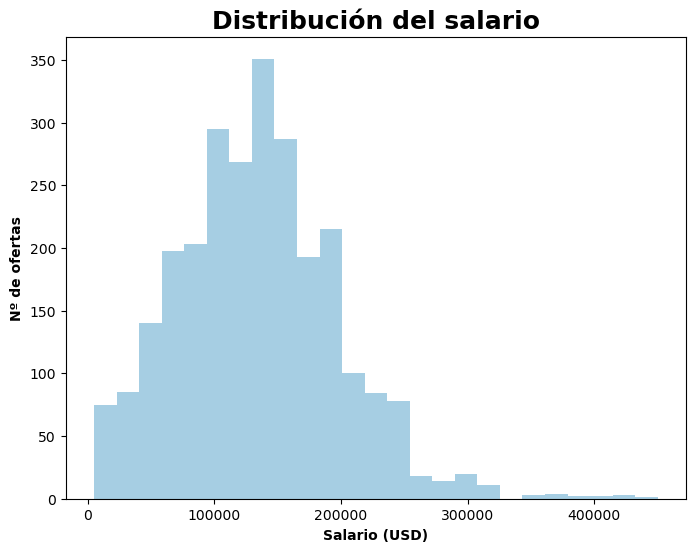

In [25]:
# Plot distribution of salary
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df['salary_in_usd'], bins=25, histtype='stepfilled', color=c_palette[0])
ax.set_title('Distribución del salario', fontdict=font_hd)
ax.set_xlabel('Salario (USD)', fontdict=font_lbl)
ax.set_ylabel('Nº de ofertas', fontdict=font_lbl)
plt.show()

#### _La mayoría del los salarios se encuentra en una horquilla entre los 100.000 y los 200.000 USD aproximádamente._

<h3 style="text-align: left; background-color: #7EB4EA; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px";font-size: 20px> 2.2 Perfiles</h3>

#### _Debido a la amplia variedad de nombres de puestos que aparecen en el Data Set, realizamos el anális sobre la nueva categoría creada "Job_category"_

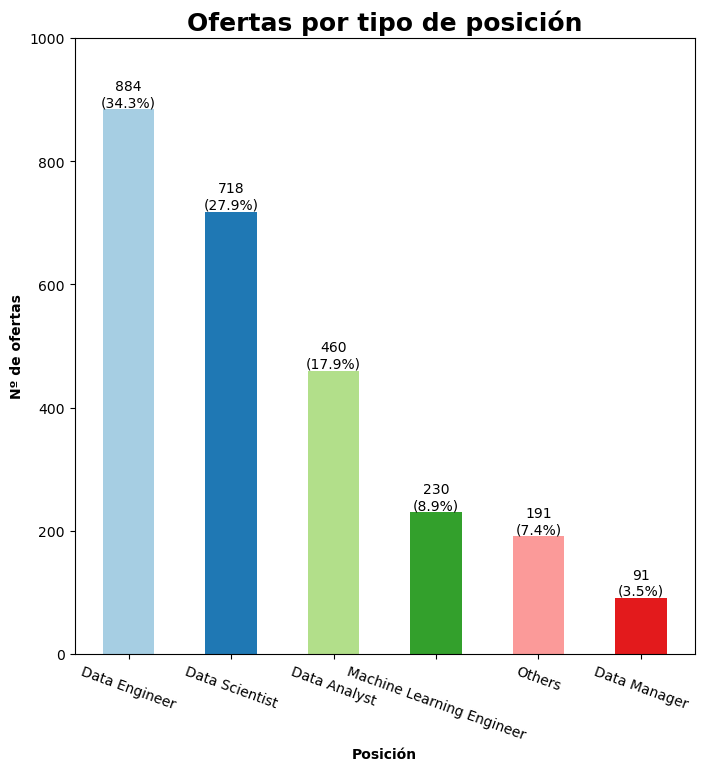

In [26]:
# Get label and values for top 5 job titles
top_roles = df['job_category'].value_counts()[:6]
x = top_roles.index
y = top_roles.values

# Calculate percentage values
total = sum(y)
percentages = [f"{(v/total)*100:.1f}%" for v in y]

# Combine counts and percentages into a single list of labels
labels = [f"{v}\n({p})" for v, p in zip(y, percentages)]

# Plot bar graph
plt.figure(figsize=set_size)
z = plt.bar(x=x, height=y, width=0.5, color=c_palette)
plt.bar_label(container=z, labels=labels, label_type='edge')
plt.title('Ofertas por tipo de posición', fontdict=font_hd)
plt.xlabel('Posición', fontdict=font_lbl)
plt.ylabel('Nº de ofertas', fontdict=font_lbl)
plt.xticks(rotation=-20)
plt.ylim(0, 1000)
plt.show()

#### _Los puestos de "Data Engineer" y "Data Sciencist" son los más demandados, seguidos por "Data Analyst"._

<h3 style="text-align: left; background-color: #7EB4EA; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px";font-size: 20px> 2.3 Experiencia </h3>

### El atributo "Experience level" presenta cuatro categorías distintas: 
   
- Entry-level / Junior
- Mid-level / Intermediate
- Senior-level / Expert
- Executive-level / Director

In [31]:
# Create a function to customize autopct parameter of plt.pie()
def make_autopct(values):
    def my_autopct(pct):
        # The pct is percentage value that matplotlib supplies for every wedge
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.2f}%  ({val})'
    return my_autopct

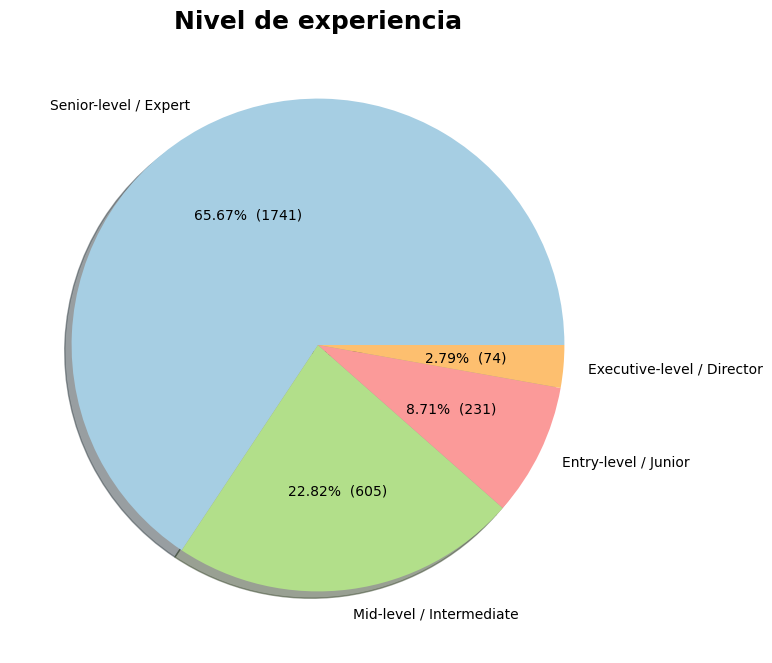

In [32]:
# Replace short forms with understandable labels
df['experience_level'].replace('EN', 'Entry-level / Junior', inplace=True)
df['experience_level'].replace('MI', 'Mid-level / Intermediate', inplace=True)
df['experience_level'].replace('SE', 'Senior-level / Expert', inplace=True)
df['experience_level'].replace('EX', 'Executive-level / Director', inplace=True)

# Set values and labels
labels = df['experience_level'].value_counts().index.to_list()
values = df['experience_level'].value_counts().to_list()

# Plot Pie Chart
plt.figure(figsize=set_size)
plt.pie(x=values, labels=labels, colors=colors, 
        autopct=make_autopct(values), shadow=True)
plt.title("Nivel de experiencia", fontdict=font_hd)
plt.show()

#### _La mayor parte de las ofertas de empleo van dirigidas a perfiles senior/expert. Tan solo un 9% de las ofertas analizadas solicitan perfiles junior_

<h3 style="text-align: left; background-color: #7EB4EA; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px";font-size: 20px> 2.3 Presencialidad </h3>

### El atributo "Remote Ratio", referido al a presencialidad, puede presentar tres valores distintos:

    0:   No remote work (less than 20%)
    50:  Partially Remote work
    100: Fully remote (more than 80%)

In [ ]:
labels = ['Fully Remote', 'No Remote', 'Partially Remote']
values = df['remote_ratio'].value_counts().to_list()

# Plot bar chart
plt.figure(figsize=set_size)
z = plt.bar(labels, values, width=0.5, tick_label=labels, color=colors)
plt.bar_label(z, labels=values)
plt.title('Presencialidad', fontdict=font_hd)
plt.xlabel('Tipo de asistencia', fontdict=font_lbl)
plt.ylabel('Nº de ofertas', fontdict=font_lbl)
plt.show()

#### _La mayoría de los empleos son teletrabajo (fully remote) y presenciales (no remote), habiendo muy pocos casos de puestos híbridos (partially remote)._

<h3 style="text-align: left; background-color: #7EB4EA; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px";font-size: 20px> 2.4 Tamaño de la empresa </h3>

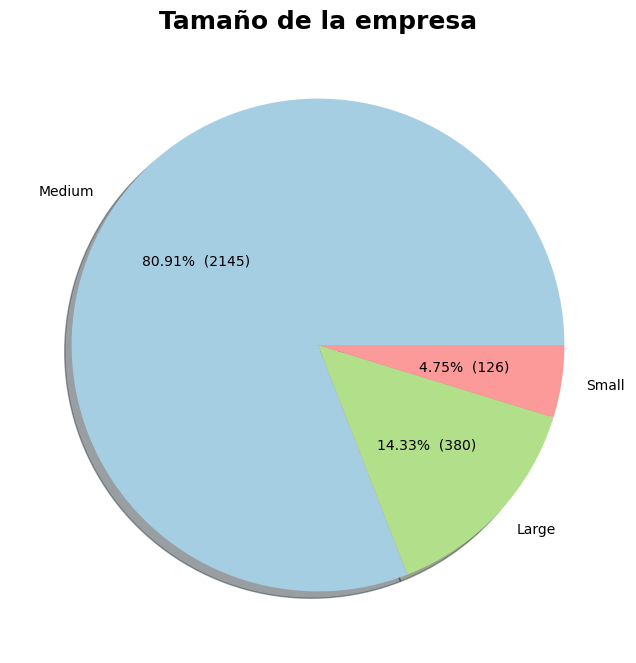

In [33]:
# Get labels for comapny size
labels = df['company_size'].value_counts().index.to_list()
labels = ['Medium', 'Large', 'Small']

# Get values for comapny size
values = df['company_size'].value_counts().to_list()

# Plot Pie Chart
plt.figure(figsize=set_size)
plt.pie(x=values, labels=labels, colors=[c_palette[0], c_palette[2], c_palette[4], c_palette[5]], 
        autopct=make_autopct(values), shadow=True)
plt.title("Tamaño de la empresa", fontdict=font_hd)
plt.show()

#### _Las empresas de tamaño medio, representan la mayoría de las ofertas de empleo_

<h3 style="text-align: left; background-color: #7EB4EA; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px";font-size: 20px> 2.5 Tipo de jornada </h3>

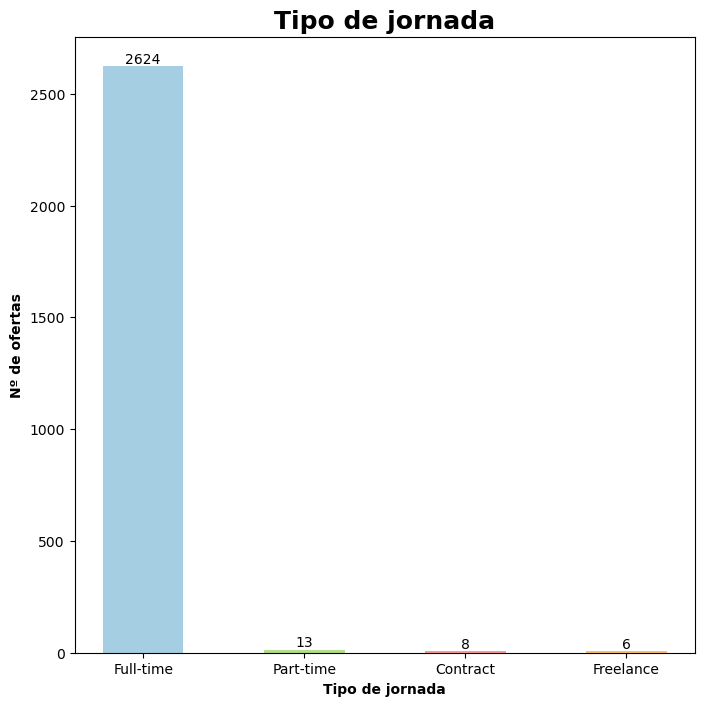

In [34]:
# Replcae abrevations with Full forms
df['employment_type'].replace('PT', 'Part-time', inplace=True)
df['employment_type'].replace('CT', 'Contract', inplace=True)
df['employment_type'].replace('FL', 'Freelance', inplace=True)
df['employment_type'].replace('FT', 'Full-time', inplace=True)

# Get label and values for employment type
labels = df['employment_type'].value_counts().index.to_list()
values = df['employment_type'].value_counts().to_list()

# Plot Bar Chart
plt.figure(figsize=set_size)
z = plt.bar(x=labels, height=values, width=0.5, color=colors)
plt.bar_label(z, labels=values, label_type='edge')
plt.title('Tipo de jornada', fontdict=font_hd)
plt.xlabel('Tipo de jornada', fontdict=font_lbl)
plt.ylabel('Nº de ofertas', fontdict=font_lbl)
plt.show()

#### _La gran mayoría de las ofertas requieren personal a tiempo completo_

<h3 style="text-align: left; background-color: #7EB4EA; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px";font-size: 20px> 2.6 Localización de la empresa </h3>

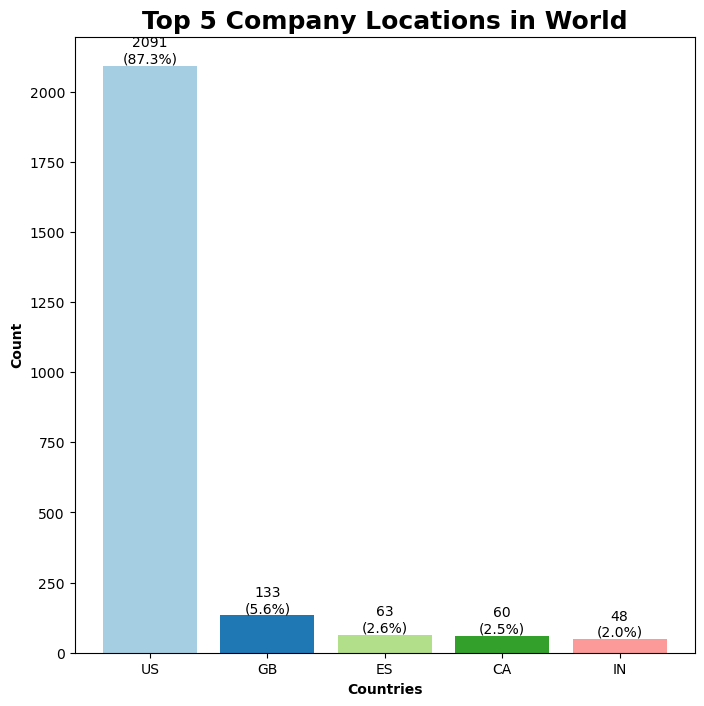

In [35]:
# Get data for top 5 countries
country = df['company_location'].value_counts().index.to_list()
val = df['company_location'].value_counts().to_list()
top_5_cont = country[:5]
top_5_val = val[:5]

# Calculate percentage values
total = sum(top_5_val)
percentages = [f"{(v/total)*100:.1f}%" for v in top_5_val]

# Combine counts and percentages into a single list of labels
labels = [f"{v}\n({p})" for v, p in zip(top_5_val, percentages)]

# Plot bar chart
plt.figure(figsize=set_size)
z = plt.bar(x=top_5_cont, height=top_5_val, color=c_palette)
plt.bar_label(z, labels=labels, label_type='edge')
plt.title('Top 5 Company Locations in World', fontdict=font_hd)
plt.xlabel('Countries', fontdict=font_lbl)
plt.ylabel('Count', fontdict=font_lbl)
plt.show()

#### _La mayoría de las ofertas incluidas en el el Data Set se localizan en US. Recordamos que partimos de la hipótesis de que estos resultados pueden ser extrapolables a la realidad europea y española a corto y medio plazo._

<h3 style="text-align: left; background-color: #3977BB; font-size: 30px; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px"> 3. Análisis multivariable </h3>

<h3 style="text-align: left; background-color: #3977BB; font-size: 24px; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px"> 3.1 Análisis de salario </h3>

<h3 style="text-align: left; background-color: #7EB4EA; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px";font-size: 20px> 3.1.1 Relación entre salario y año de publicación de la oferta </h3>

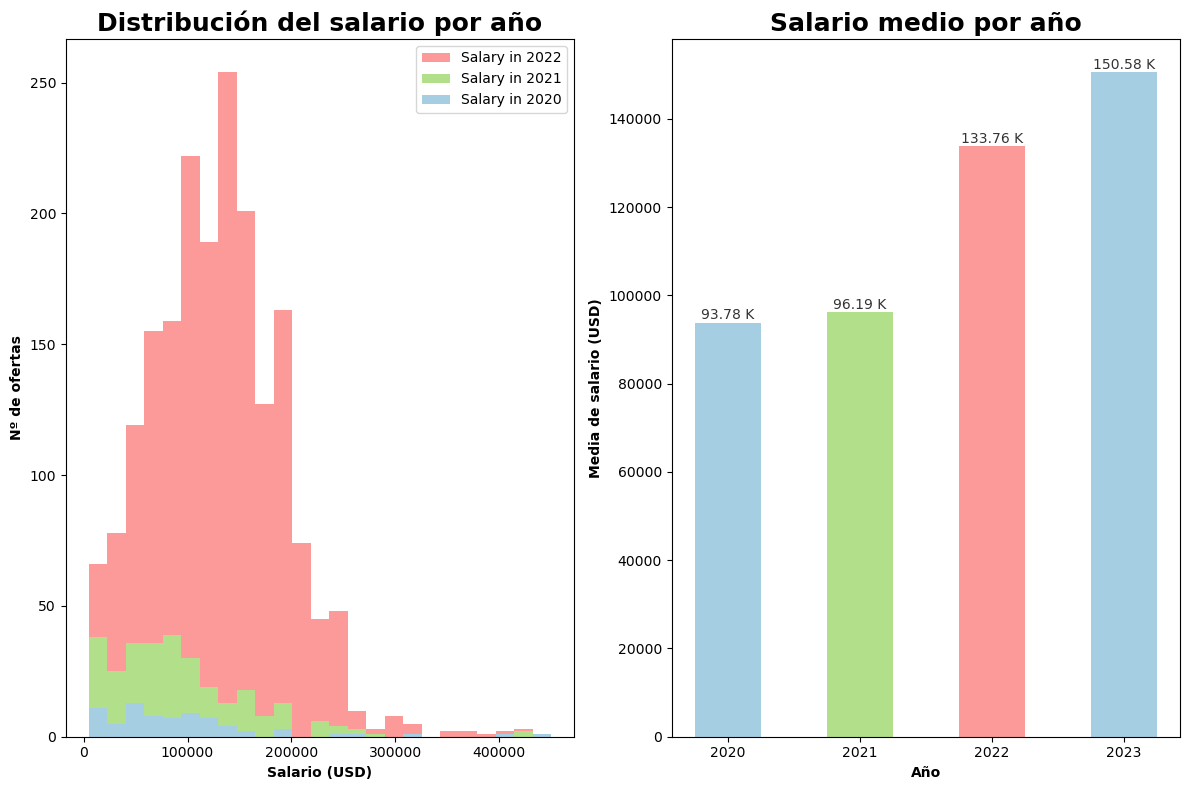

In [36]:
# Group data by year
year_2020 = df.loc[(df['work_year'] == 2020)]
year_2021 = df.loc[(df['work_year'] == 2021)]
year_2022 = df.loc[(df['work_year'] == 2022)]
year_2023 = df.loc[(df['work_year'] == 2023)]

plot_data = [year_2020['salary_in_usd'],
            year_2021['salary_in_usd'],
            year_2022['salary_in_usd']]
labels = ['Salary in 2020', 'Salary in 2021', 'Salary in 2022','Salary in 2023']

# Find mean of salary for each work year
wy_sal = pd.DataFrame(columns=['2020', '2021', '2022','2023'])
wy_sal['2020'] = year_2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
wy_sal['2021'] = year_2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
wy_sal['2022'] = year_2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
wy_sal['2023'] = year_2023.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

# Plot distribution of salary
fig, axes = plt.subplots(figsize=(12, 8), nrows=1, ncols=2)
axes[0].hist(plot_data, bins=25, histtype='stepfilled',color=[c_palette[0], c_palette[2], c_palette[4]],
             label=labels, stacked=True)
axes[0].legend()
axes[0].set_title('Distribución del salario por año', fontdict=font_hd)
axes[0].set_xlabel('Salario (USD)', fontdict=font_lbl)
axes[0].set_ylabel('Nº de ofertas', fontdict=font_lbl)

# Gather data to plot mean
x = wy_sal.columns.values.astype(int)
h = wy_sal.values.tolist()[0]
labels = np.round([num/1000 for num in wy_sal.values.tolist()[0]], 2)
labels = list(map(str, labels))
new_labels = [labels[i] + ' K' for i in range(len(labels))]
colors = [c_palette[0], c_palette[2], c_palette[4]]

# Plot mean using bar plot
bar = plt.bar(x, h, width=0.5, color=colors,
       tick_label=[2020, 2021, 2022, 2023])
axes[1].bar_label(bar, new_labels, fmt='%b', alpha=0.8, padding=0.3)

# plt.yticks(ticks=plt.yticks()[1:], labels=[a/1000 for a in plt.yticks()[0]])
axes[1].set_title('Salario medio por año', fontdict=font_hd)
axes[1].set_xlabel('Año', fontdict=font_lbl)
axes[1].set_ylabel('Media de salario (USD)', fontdict=font_lbl)
plt.tight_layout()
plt.show()

#### _1. El salario medio de las ofertas va en aumento. El salto más alto se produce entre 2021 y 2022_.
#### _2. La mayoría de los salarios en 2022 se encuentra en una horquilla que aproximadamente va desde los 90k hasta los 200k._

<h3 style="text-align: left; background-color: #7EB4EA; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px";font-size: 20px> 3.1.2 Relación entre salario y nivel de experiencia </h3>

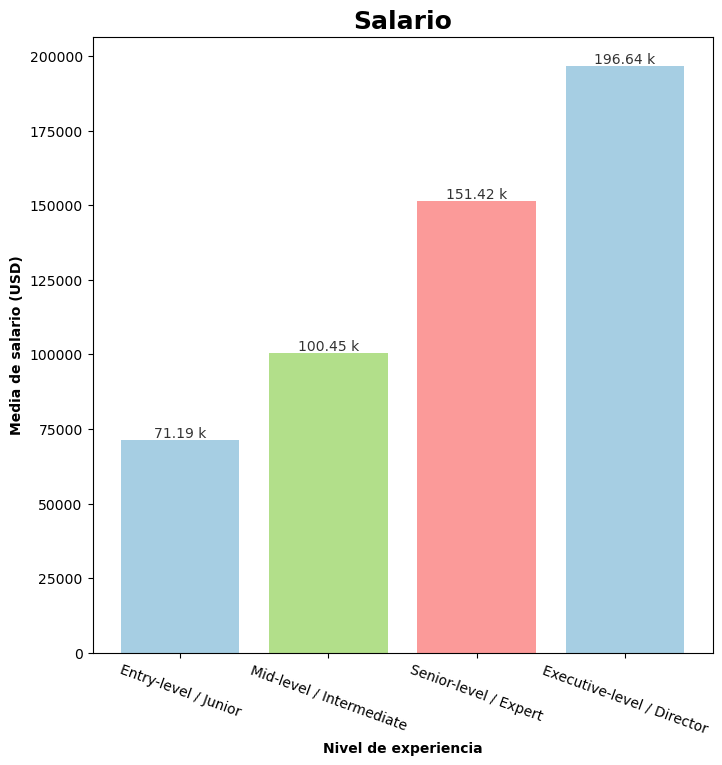

In [37]:
# Get data for salary and experience level
exp_sal = df[['experience_level', 'salary_in_usd']]

# Get salaries by experience level
entry_lev = exp_sal.loc[exp_sal['experience_level'] == 'Entry-level / Junior']
mid_lev = exp_sal.loc[exp_sal['experience_level'] == 'Mid-level / Intermediate']
senior_lev = exp_sal.loc[exp_sal['experience_level'] == 'Senior-level / Expert']
executive_lev = exp_sal.loc[exp_sal['experience_level'] == 'Executive-level / Director']

labels = ['Entry-level / Junior', 'Mid-level / Intermediate',
          'Senior-level / Expert', 'Executive-level / Director']
values = [entry_lev['salary_in_usd'].mean(), mid_lev['salary_in_usd'].mean(),
         senior_lev['salary_in_usd'].mean(), executive_lev['salary_in_usd'].mean()]

# Sort labels and values in ascending order
sorted_labels, sorted_values = zip(*sorted(zip(labels, values), key=lambda x: x[1], reverse=False))

# Format 'values' for mean
values_fmt = np.round([x/1000 for x in values], 2)
values_fmt = list(map(str, values_fmt))
values_fmt = [values_fmt[i] + ' k' for i in range(len(values_fmt))]

# Plot a bar graph
plt.figure(figsize=set_size)
plt.xticks(rotation=-20)
bar = plt.bar(sorted_labels, sorted_values, color=colors)
plt.bar_label(bar, values_fmt, fmt='%b', alpha=0.8)
plt.title('Salario', fontdict=font_hd)
plt.xlabel('Nivel de experiencia', fontdict=font_lbl)
plt.ylabel('Media de salario (USD)', fontdict=font_lbl)
plt.show()

#### _1. El mayor salto de salario está en el perfil Senior._
#### _2. Las ofertas para perfil Junior tienen un salario medio de 71k._
     

<h3 style="text-align: left; background-color: #7EB4EA; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px";font-size: 20px> 3.1.3 Relación entre salario y tamaño de la empresa </h3>

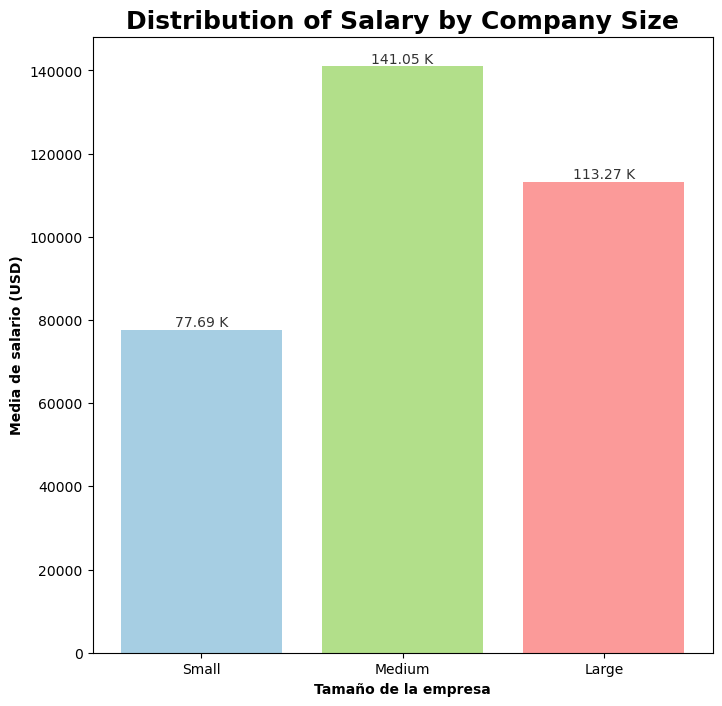

In [38]:
sal_co = df[['salary_in_usd', 'company_size']]

# Get salaries in clusters of size of companies
sal_S = sal_co.loc[sal_co['company_size'] == 'S']
sal_M = sal_co.loc[sal_co['company_size'] == 'M']
sal_L = sal_co.loc[sal_co['company_size'] == 'L']
labels = ['Small', 'Medium', 'Large']

# Get mean salary by company size
sal_mean = [sal_S['salary_in_usd'].mean(), sal_M['salary_in_usd'].mean(),
            sal_L['salary_in_usd'].mean()]
fmt_labels = np.round([x/1000 for x in sal_mean], 2)
fmt_labels = list(map(str, fmt_labels))
fmt_labels = [x + ' K' for x in fmt_labels]

# Sort labels and values in descending order
sorted_labels, sorted_values = zip(*sorted(zip(labels, values), key=lambda x: x[1], reverse=True))

# Plot bar chart
plt.figure(figsize=set_size)
z = plt.bar(labels, sal_mean, color=colors)
plt.bar_label(z, fmt_labels, alpha=0.8)
plt.title('Distribution of Salary by Company Size', fontdict=font_hd)
plt.xlabel('Tamaño de la empresa', fontdict=font_lbl)
plt.ylabel('Media de salario (USD)', fontdict=font_lbl)
plt.show()

#### _Las ofertas de las empresas de tamaño medio son las que ofrecen un mayor salario_

<h3 style="text-align: left; background-color: #7EB4EA; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px";font-size: 20px> 3.1.4 Relación entre salario y tipo de puesto </h3>

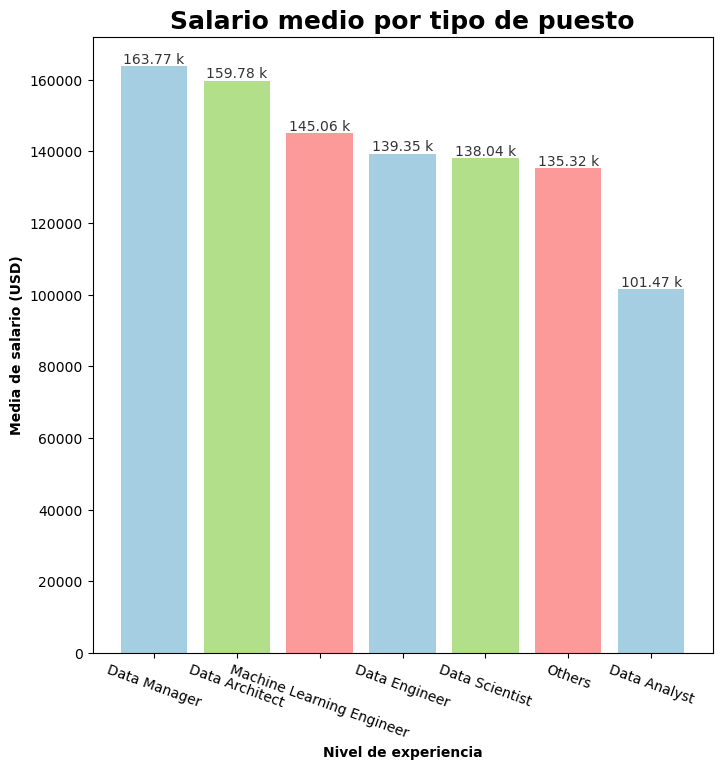

In [39]:
# Get data for salary and job_category
exp_sal = df[['job_category', 'salary_in_usd']]

# Get salaries by job category
data_analyst = exp_sal.loc[exp_sal['job_category'] == 'Data Analyst']
data_architect = exp_sal.loc[exp_sal['job_category'] == 'Data Architect']
data_engineer = exp_sal.loc[exp_sal['job_category'] == 'Data Engineer']
data_manager = exp_sal.loc[exp_sal['job_category'] == 'Data Manager']
data_scientist = exp_sal.loc[exp_sal['job_category'] == 'Data Scientist']
machine_learning = exp_sal.loc[exp_sal['job_category'] == 'Machine Learning Engineer']
others = exp_sal.loc[exp_sal['job_category'] == 'Others']

labels = ['Data Analyst', 'Data Architect',
         'Data Engineer', 'Data Manager', 'Data Scientist', 'Machine Learning Engineer', 'Others']

values = [data_analyst['salary_in_usd'].mean(), data_architect['salary_in_usd'].mean(),
         data_engineer['salary_in_usd'].mean(), data_manager['salary_in_usd'].mean(),data_scientist['salary_in_usd'].mean(),machine_learning['salary_in_usd'].mean(), others['salary_in_usd'].mean()]

# Sort values and labels in descending order
values, labels = zip(*sorted(zip(values, labels), reverse=True))

# Format 'values' for mean
values_fmt = np.round([x/1000 for x in values], 2)
values_fmt = list(map(str, values_fmt))
values_fmt = [values_fmt[i] + ' k' for i in range(len(values_fmt))]

# Plot a bar graph
plt.figure(figsize=set_size)
plt.xticks(rotation=-20)
bar = plt.bar(labels, values, color=colors)
plt.bar_label(bar, values_fmt, fmt='%b', alpha=0.8)
plt.title('Salario medio por tipo de puesto', fontdict=font_hd)
plt.xlabel('Nivel de experiencia', fontdict=font_lbl)
plt.ylabel('Media de salario (USD)', fontdict=font_lbl)
plt.show()

#### _Los puestos con mayores sueldos son Data Manager y Data Arquitect. Los puestos con menores sueldos son Data Analyst y Data Scientist._

<h3 style="text-align: left; background-color: #3977BB; font-size: 24px; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px"> 3.1 Otros análisis </h3>

<h3 style="text-align: left; background-color: #7EB4EA; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px";font-size: 20px> 3.1.1 Relación entre tipo de puesto y año</h3>

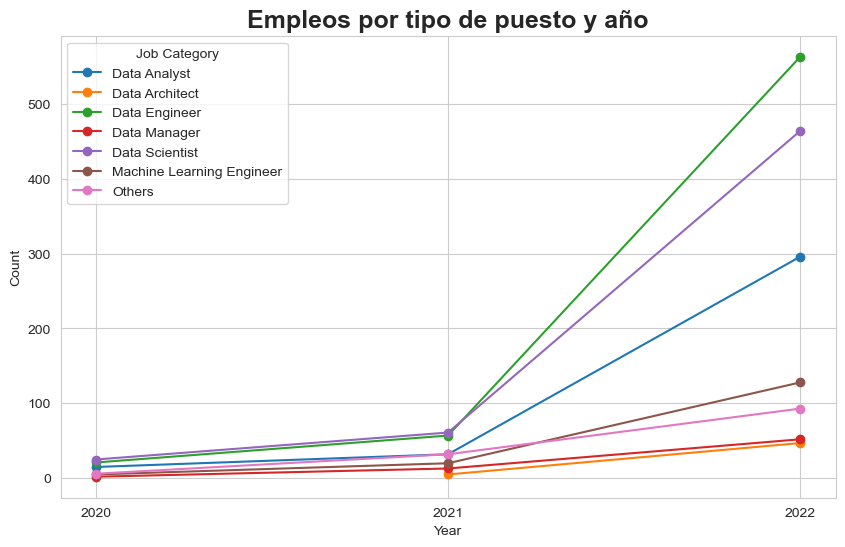

In [40]:
# Group the data by year and job category
counts = df.groupby(['work_year', 'job_category'])['job_category'].count().unstack()

# Exclude data for year 2023
counts = counts.loc[counts.index != 2023]

# Plot the data as a line chart
sns.set_style('whitegrid')
counts.plot(kind='line', marker='o', figsize=(10, 6))

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Empleos por tipo de puesto y año', fontdict=font_hd)
plt.legend(title='Job Category', loc='upper left')

# Convert index values to integers and set x-axis ticks
years = counts.index.astype(int)
plt.xticks(years)

plt.show()

### _Las ofertas de todos los tipos de puestos han aumentado en el año 2022, pero este incremento ha sido mayor en el caso de las ofertas de Data Engineer y Data Scientist, seguido de Data Analyst. Esto se explica en parte porque la demanda de empleo es mayor para estos tres roles._

<h3 style="text-align: left; background-color: #7EB4EA; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px";font-size: 20px> 3.1.1 Relación entre tipo de presencialidad y año

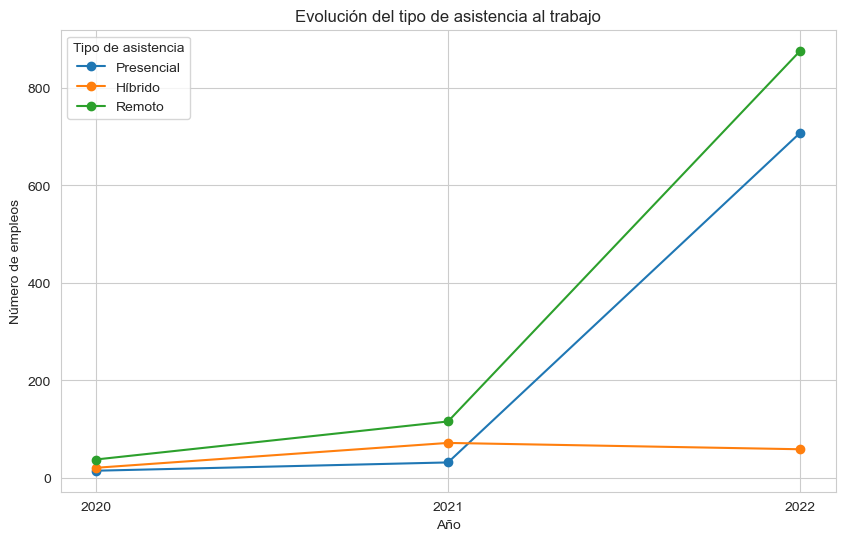

In [41]:
# Group the filtered data by year and remote ratio
counts = df.groupby(['work_year', 'remote_ratio'])['remote_ratio'].count().unstack()

# Exclude data for year 2023
counts = counts.loc[counts.index != 2023]

# Plot the data as a line chart
sns.set_style('whitegrid')
ax = counts.plot(kind='line', marker='o', figsize=(10, 6))

# Add labels, title, and legend
plt.xlabel('Año')
plt.ylabel('Número de empleos')
plt.title('Evolución del tipo de asistencia al trabajo')

# Customize legend
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Presencial', 'Híbrido', 'Remoto']
ax.legend(handles, new_labels, title='Tipo de asistencia', loc='upper left')

# Convert index values to integers and set x-axis ticks
years = counts.index.astype(int)
plt.xticks(years)

plt.show()

### _El número de ofertas de empleo "en remoto" ha evolucionado en el año 2021 de manera ligeramente superior al número de ofertas en modalidad "presencial"_

<h3 style="text-align: left; background-color: #3977BB; font-size: 24px; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px"> Análisis de ofertas para posiciones Junior </h3>

<h3 style="text-align: left; background-color: #3977BB; font-size: 30px; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px"> 4. Relación entre variables en los datos </h3>

### Transformación del DF a un marco de datos que solo tiene atributos numéricos con las mismas características que en el conjunto de datos original.


In [55]:
# Get numeric and categorical columns
num_attribs = ['work_year', 'salary_in_usd', 'remote_ratio']
cat_attribs = [df.columns[i] for i in range(len(df.columns)) if df.columns[i] not in num_attribs]
# Create a DataFrame with only numeric values
num_df = df[num_attribs]
# Create a DataFrame with only categorical values
cat_df = df[cat_attribs]
# Apply OrdinalEncoder from sklearn (assigns numeric values to categorical features)
ordinal_enc = OrdinalEncoder()
cat_df_enc = ordinal_enc.fit_transform(cat_df)
# Convert numpy array to pandas DataFrame
cat_enc_df = pd.DataFrame(data=cat_df_enc, columns=cat_attribs)
# Join encoded df and numeric df
enc_df = num_df.join(cat_enc_df)
enc_df.head()

,work_year,salary_in_usd,remote_ratio,experience_level,employment_type,job_title,job_category,company_location,company_size
0,2023,104000,100,3.0,2.0,27.0,2.0,68.0,1.0
1,2023,65000,100,3.0,2.0,27.0,2.0,68.0,1.0
2,2023,230000,0,3.0,2.0,78.0,2.0,68.0,1.0
3,2023,148000,0,3.0,2.0,78.0,2.0,68.0,1.0
4,2023,269000,100,3.0,2.0,59.0,5.0,12.0,1.0


<h3 style="text-align: left; background-color: #3977BB; font-size: 24px; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px"> 4.1 Análisis de Spearman </h3>

salary_in_usd       1.000000
company_location    0.516238
experience_level    0.411238
work_year           0.240091
job_title           0.156858
job_category        0.140133
company_size        0.023627
employment_type    -0.028601
remote_ratio       -0.031679
Name: salary_in_usd, dtype: float64

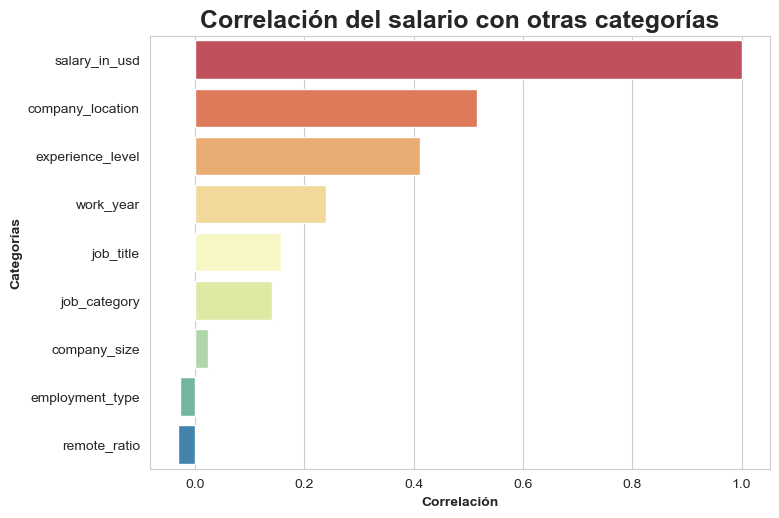

In [56]:
# Get correlation matrix
corr_matrix = enc_df.corr(method='spearman')
spr = corr_matrix['salary_in_usd'].sort_values(ascending=False)
# Plot confusion matrix
plt.figure(figsize=(8, (0.625*len(spr.index))))
sns.barplot(x=spr.values, y=spr.index, orient='h', palette="Spectral", )
plt.title("Correlación del salario con otras categorías", fontdict=font_hd)
plt.xlabel("Correlación", fontdict=font_lbl)
plt.ylabel("Categorías", fontdict=font_lbl)

spr

#### _La mayor correlación respecto a la variable salario se da en las siguientes categorías:_
 #### _1. Localización de la empresa._
  ####   _2. Nivel de experiencia._
  ####  _3. Año de publicación de la oferta._

    
#### _La variable "salary_in_usd" tiene una correlación positiva moderada con "company_location" y "work_year". Además, hay una correlación positiva débil con "Work Year" y "company_size". Las variables restantes tienen una correlación muy débil o negativa con "salary_in_usd"._

<h3 style="text-align: left; background-color: #3977BB; font-size: 24px; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px"> 4.2. Matriz de confusión </h3>

<a id="4-4-B"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (B) Confusion Matrix for Salary, Work year and Remote Ratio
</p>
</div>

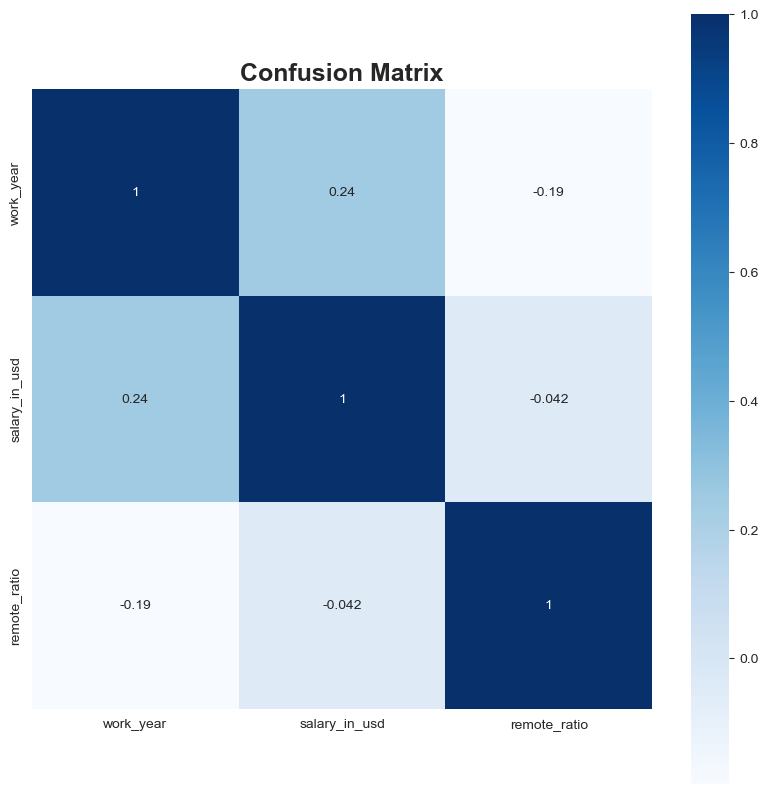

In [57]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, square=True, cbar=True, cmap="Blues")
plt.title("Confusion Matrix", fontdict=font_hd)
plt.show()

<h3 style="text-align: left; background-color: #3977BB; font-size: 30px; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px"> 5. Conclusiones</h3>